In [2]:
# https://docs.google.com/spreadsheets/d/1ZLOL0nnYwz5BPUgd3PqSyEw27C7A9WcfZRg4y-XAqic/edit?usp=sharing
# link to data

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [17]:
# You have to use the encoding as latin1 to read this file as there are some special character in this file
df = pd.read_csv("Diwali_Sales_Data.csv",encoding = 'unicode_escape')

<h3>
    What I did in this project :<br><br>    
    <ul>
        <li> Performed Data Cleaning</li><br>
        <li> Performed EDA using Pandas, Matplotlib and Seaborn</li><br>
        <li> Can improve customer experience by identifying potential customer across different gender, states, occupation etc, from mentioned below conclusions</li><br>
        <li> Can improve sales by identifying most selling product categories and products which can help to plan inventory and meet the customer demands, from below mentioned conclusions</li><br>
    </ul>
    </h3>

# Data Cleaning

In [18]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [19]:
df.isna().sum()

User_ID                 0
Cust_name               0
Product_ID              0
Gender                  0
Age Group               0
Age                     0
Marital_Status          0
State                   0
Zone                    0
Occupation              0
Product_Category        0
Orders                  0
Amount                 12
Status              11251
unnamed1            11251
dtype: int64

In [20]:
df.shape

(11251, 15)

 <h3> Here we can see the Status and unnamed1 cols are completely empty,so we can drop those cols </h3>

In [21]:
df.drop(['Status','unnamed1'],axis = 'columns', inplace = True)

In [23]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.1+ MB


In [25]:
df.isna().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

<h3>
    Here we can see that Amount has 12 rows as Null.
    
    12/11251 = 0.001066571
     i.e 0.1% of total data is NULL so we can freely drop it
</h3>

In [26]:
df.dropna(inplace = True)

In [28]:
df.shape

(11239, 13)

In [30]:
df.isna().sum()  # No Null Values :)

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [31]:
df.dtypes

User_ID               int64
Cust_name            object
Product_ID           object
Gender               object
Age Group            object
Age                   int64
Marital_Status        int64
State                object
Zone                 object
Occupation           object
Product_Category     object
Orders                int64
Amount              float64
dtype: object

In [33]:
df[['Age', 'Marital_Status','Amount']].describe()

,Age,Marital_Status,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,0.420055,9453.610858
std,12.753866,0.493589,5222.355869
min,12.000000,0.000000,188.000000
25%,27.000000,0.000000,5443.000000
50%,33.000000,0.000000,8109.000000
75%,43.000000,1.000000,12675.000000
max,92.000000,1.000000,23952.000000


# Data Analysis

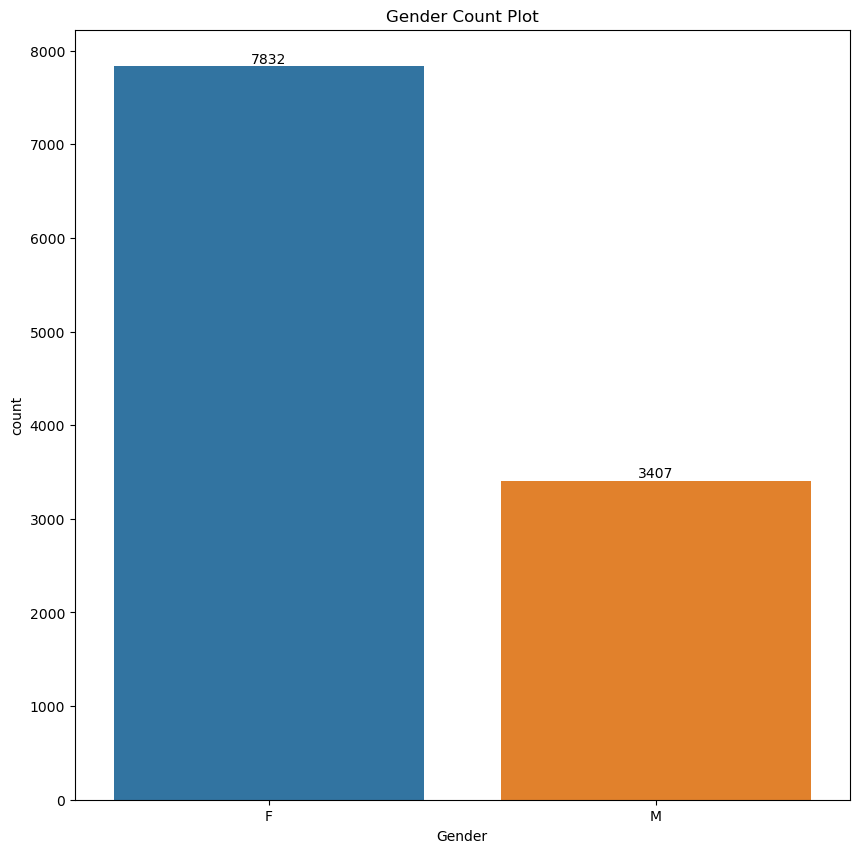

In [83]:
fig = plt.figure(figsize = (10,10))
ax = sns.countplot(x='Gender',data=df)
# This for loop is for showing numbers on the bar chart,
# as without this loop we will get only the chart and not the count written on graph
plt.title('Gender Count Plot')
for bar in ax.containers:
    ax.bar_label(bar)
fig.savefig('gender_count_plot.png')

Now we will find that which gender spend more.
here above we have seen that female count is more,
and male is less in festival shopping

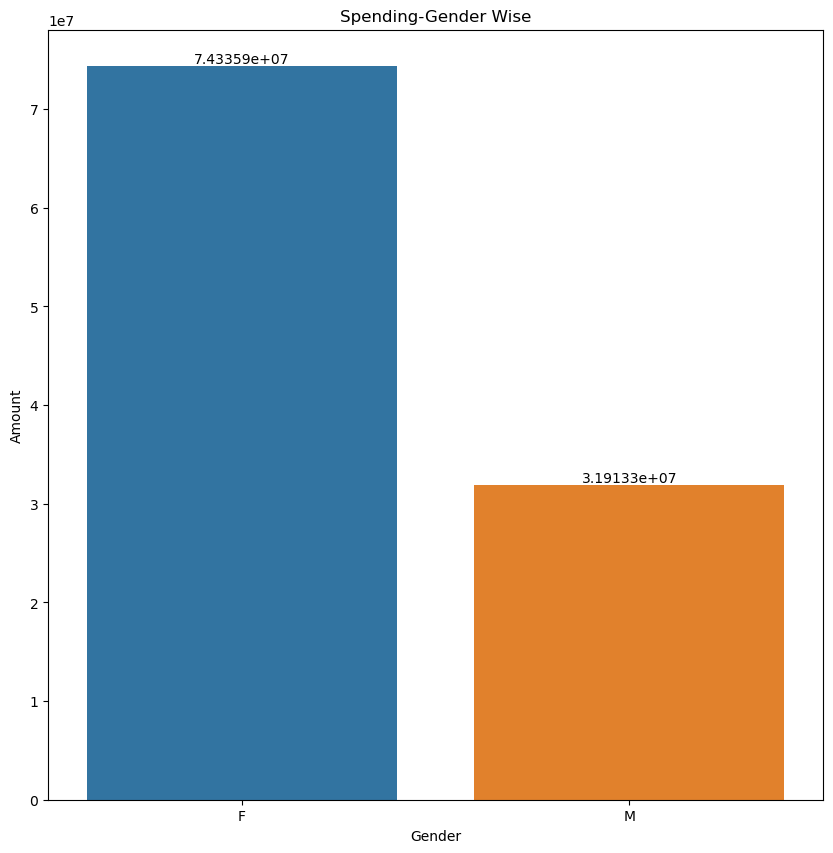

In [84]:
fig = plt.figure(figsize = (10,10))

gender_group = df.groupby('Gender',as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
# Here we are finding that what is the total amount spent by each gender in descending order

ax = sns.barplot(x = 'Gender', y = 'Amount', data=gender_group);

plt.title('Spending-Gender Wise')
for bar in ax.containers:
    ax.bar_label(bar)
    
fig.savefig('gender_group_plot.png')

In [42]:
gender_group

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


Females spent more than male
:)

#  On Age


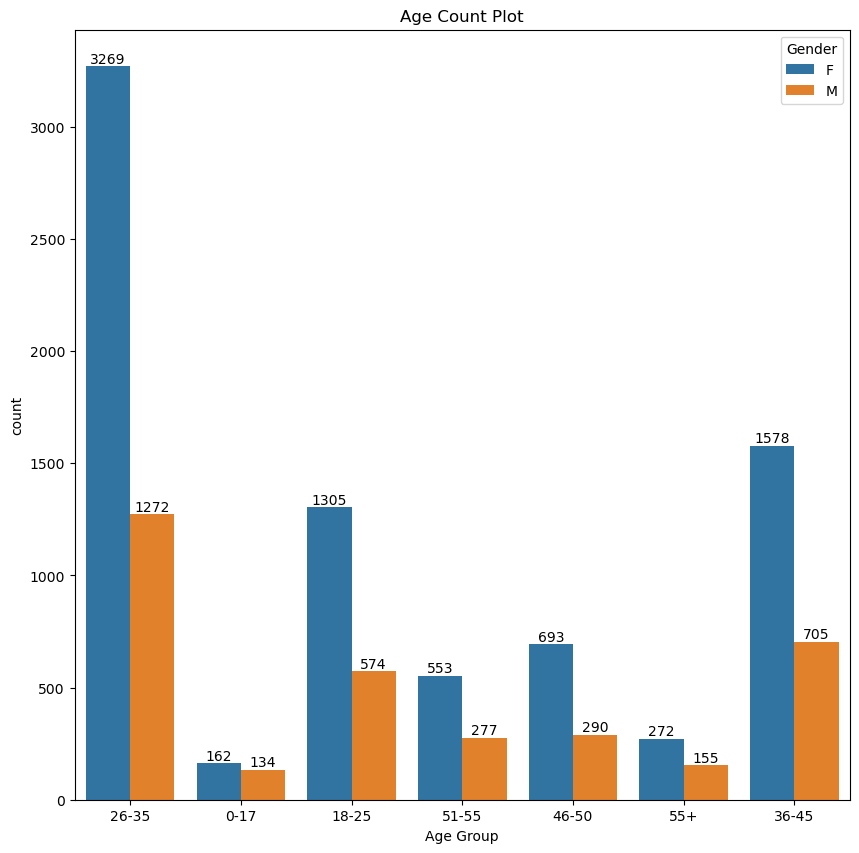

In [85]:
fig = plt.figure(figsize = (10,10))
ax = sns.countplot(data = df, x='Age Group', hue = 'Gender')

plt.title('Age Count Plot')
for bar in ax.containers:
    ax.bar_label(bar)
fig.savefig('age_group_plot.png')

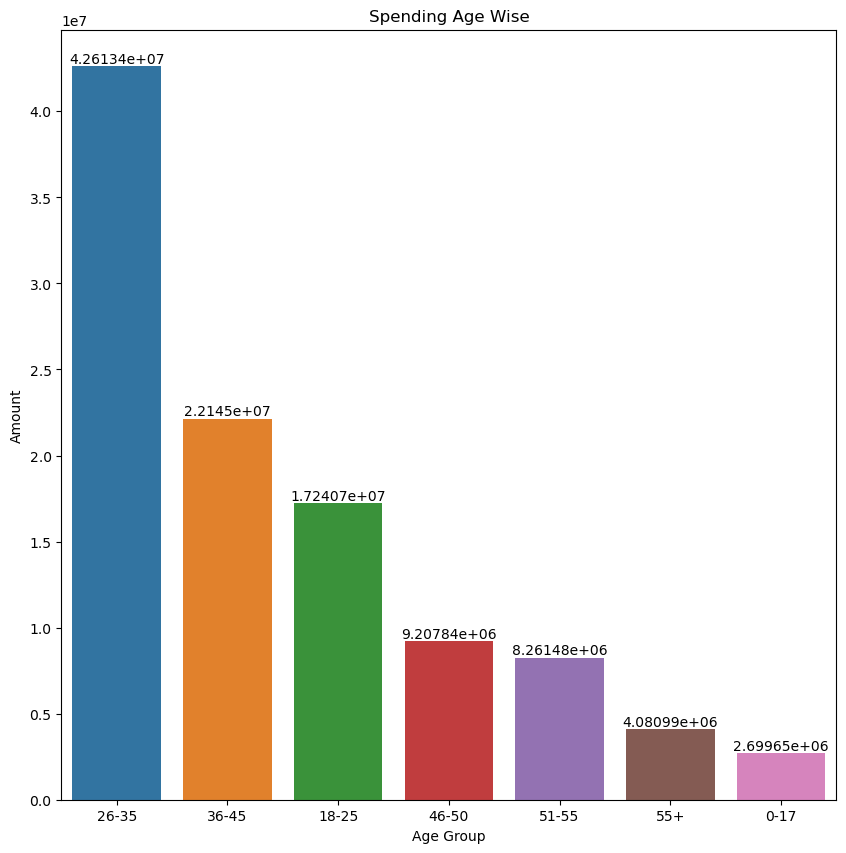

In [87]:
fig = plt.figure(figsize = (10,10))
age_group = df.groupby(['Age Group'],as_index = False)['Amount'].sum().sort_values(by = 'Amount',ascending = False)
# Here we are finding that what is the total amount spent by each gender in descending order

ax = sns.barplot(x = 'Age Group', y = 'Amount', data=age_group)
plt.title('Spending Age Wise')

for bar in ax.containers:
    ax.bar_label(bar)
    
fig.savefig('age_group_spending_plot.png')

In [49]:
age_group

,Age Group,Amount
2,26-35,42613443.94
3,36-45,22144995.49
1,18-25,17240732.00
4,46-50,9207844.00
5,51-55,8261477.00
6,55+,4080987.00
0,0-17,2699653.00


So from the Graph above we can see that,the age group of 26-35 tends to spend more than any other age group.

#bohot pesa hai unke pass :)

we can see the money spent in the graph 


# State

Now finding that which state is spending more?

kon hai sabse jyada paise wala

<Figure size 1000x1000 with 0 Axes>

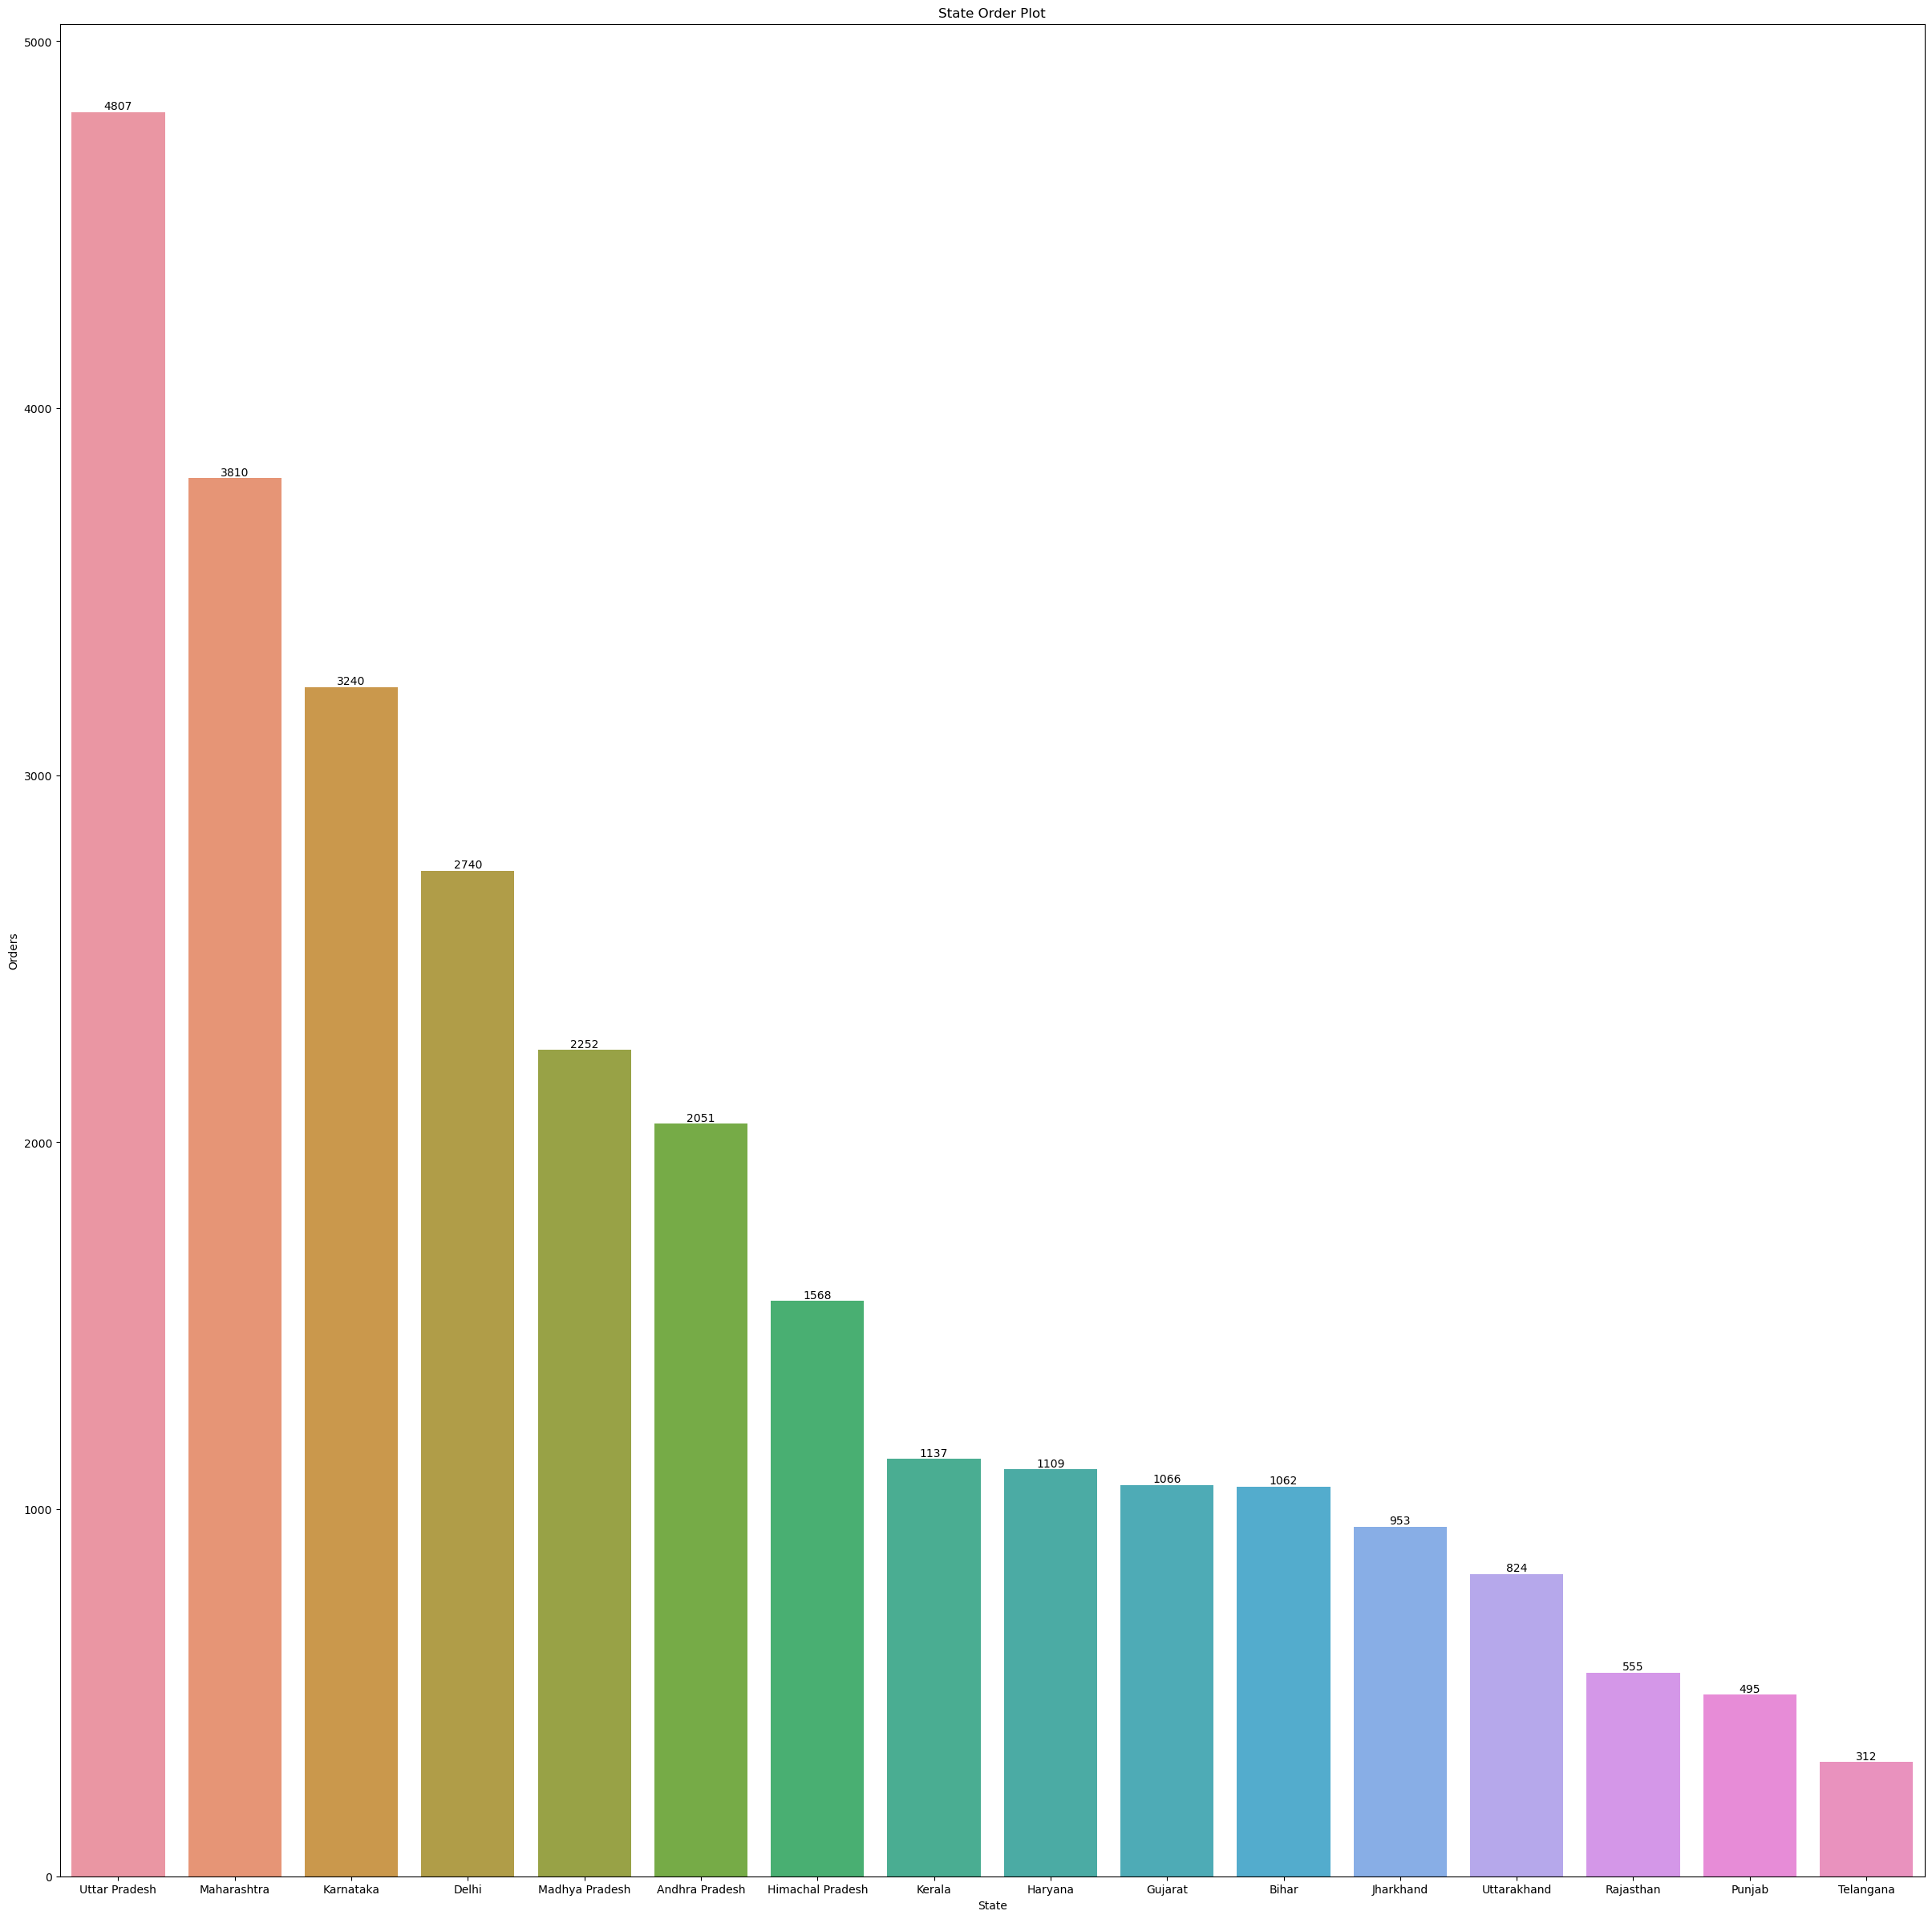

In [88]:
fig = plt.figure(figsize = (10,10))

state_group = df.groupby(['State'], as_index = False)['Orders'].sum().sort_values(by='Orders',ascending = False)
fig = plt.figure(figsize=(30,30))
ax = sns.barplot(data=state_group, x='State',y='Orders')
plt.title('State Order Plot')
for bar in ax.containers:
    ax.bar_label(bar)

fig.savefig('state_order_plot.png')

# UP on TOP
i.e. UttarPradesh has most orders from the given states

<Figure size 1000x1000 with 0 Axes>

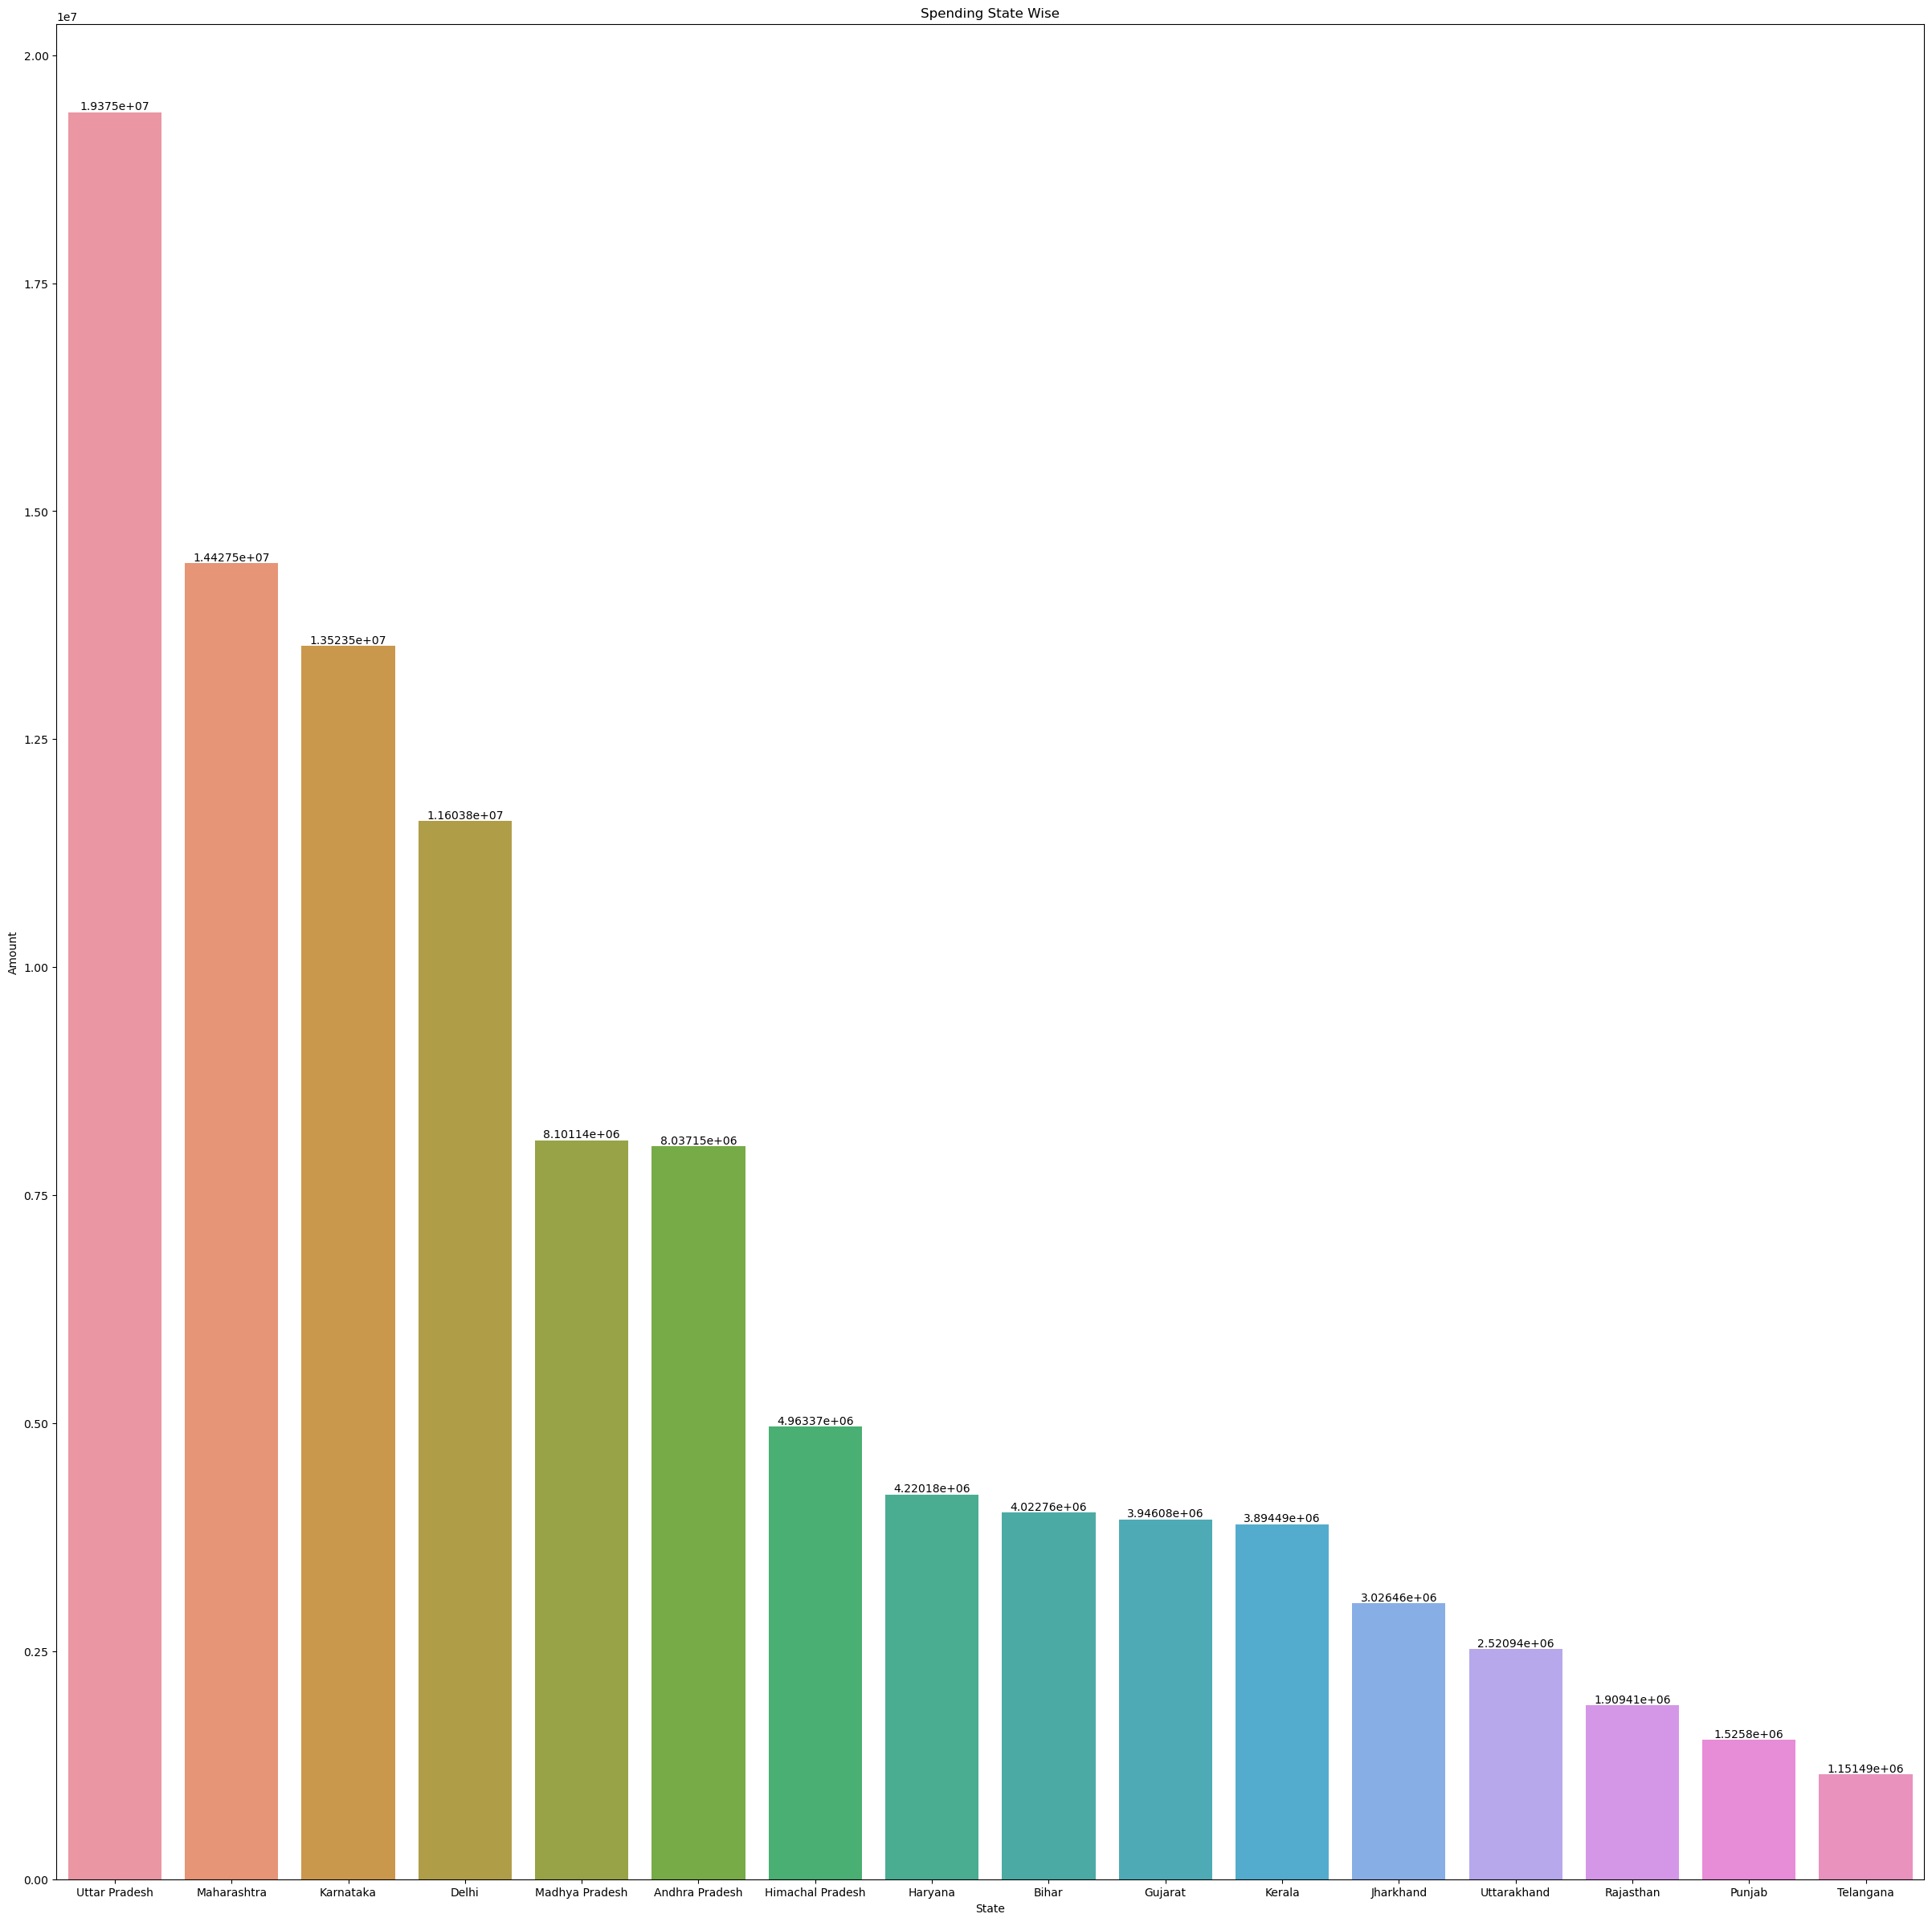

In [89]:
fig = plt.figure(figsize = (10,10))

state_group = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by='Amount',ascending = False)
fig = plt.figure(figsize=(30,30))
ax = sns.barplot(data=state_group, x='State',y='Amount')

plt.title('Spending State Wise')
for bar in ax.containers:
    ax.bar_label(bar)

fig.savefig('state_amount_plot.png')

# But why we made this Graph, or can't we directly make this one instead of orders one?

We made this graph and the graph above because we want to find that <i> does numbers of high orders leads to high amount ?</i>

So, from this graph,we can observe the change in order of states and can see that the number of orders does not lead to high amount.

Observation : After Himachal Pradesh, Haryana, Bihar and Gujarat were plotted in amount graph, but in orders graph Kerala was plotted after Himachal Pradesh

 Amount wise also spending of UP is Highest,
 
 And before this we concluded that the age group of 26-35 spends the most,
 and in that too we concluded that females of age group 26-35 spends the most.
 
 So, from this graph we can conclude that the <b> <i> Females of age group 26-35 from UP Spends the most </i> </b>

# Who spends more? Married or Unmarried

' \nMarital Status -> 0 -> Married\n                  1 -> UnMarried\n'

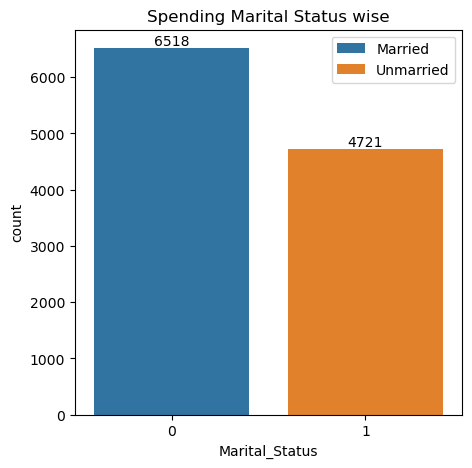

In [94]:
fig = plt.figure(figsize = (5,5))
ax = sns.countplot(data = df, x = 'Marital_Status',label={'Unmarried','Married'})
plt.title('Spending Marital Status wise')
plt.legend()
for bar in ax.containers :
    ax.bar_label(bar)
fig.savefig('marital_count_plot.png')


''' 
Marital Status -> 0 -> Married
                  1 -> UnMarried
'''

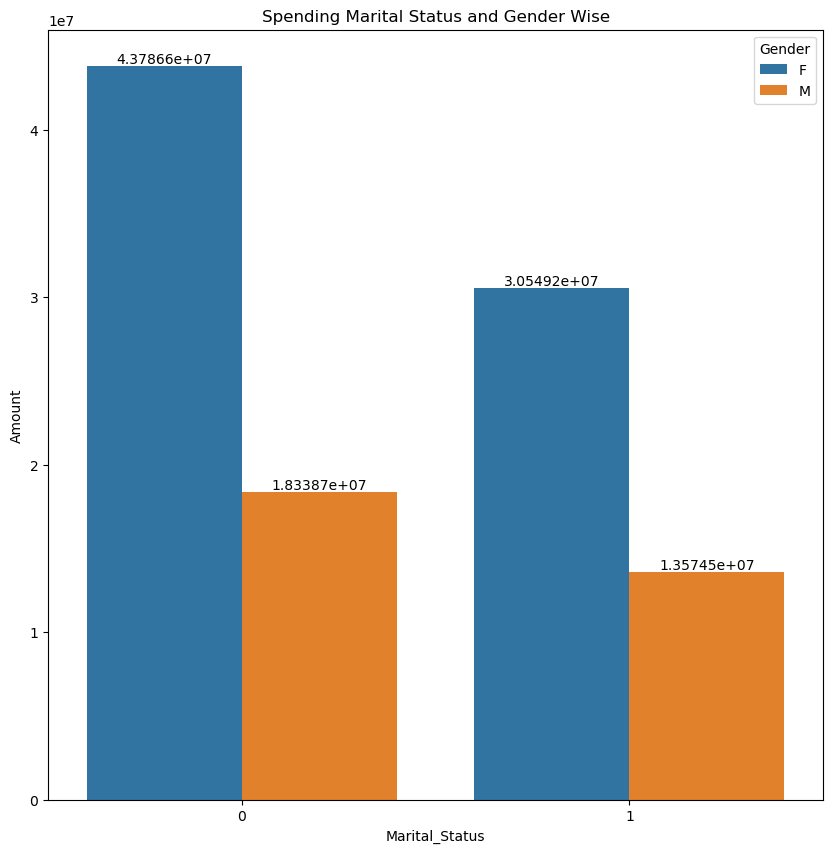

In [96]:
fig = plt.figure(figsize = (10,10))
maried_group = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values(by='Amount',ascending = False)

ax = sns.barplot(data = maried_group, x='Marital_Status',y='Amount',hue='Gender')
plt.title('Spending Marital Status and Gender Wise')
for bar in ax.containers :
    ax.bar_label(bar)
fig.savefig('maried_status_vs_amount_plot.png')

So from this graph we can conclude that married womens spend more...
4CR 🙂

# On basis of occupation

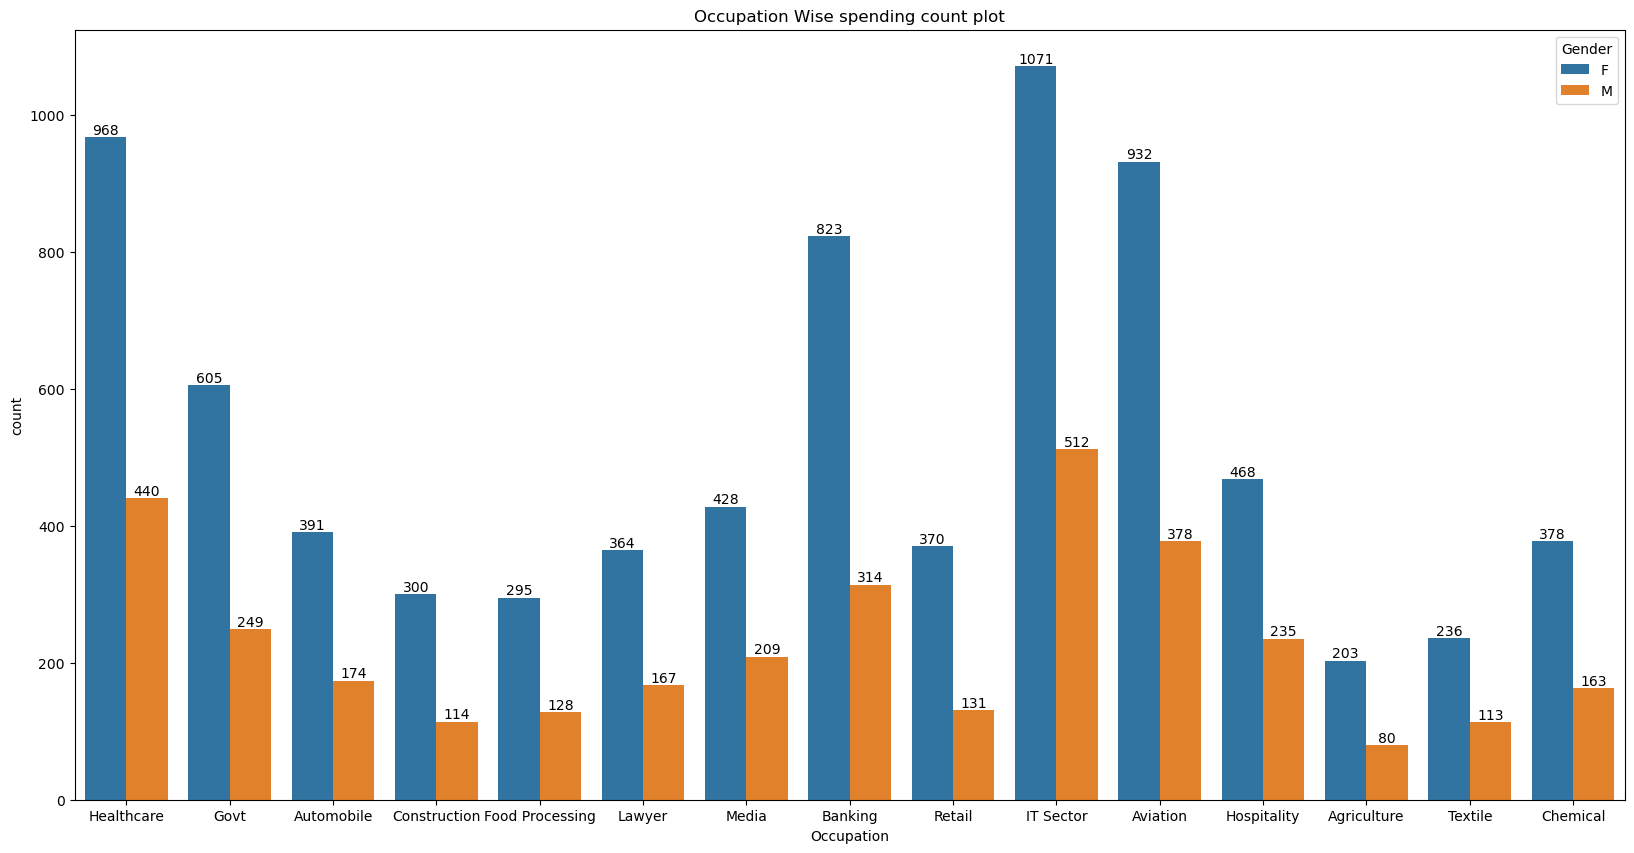

In [98]:
fig = plt.figure(figsize = (20,10))
ax = sns.countplot(data=df, x='Occupation',hue = 'Gender')
plt.title('Occupation Wise spending count plot')
for bar in ax.containers:
    ax.bar_label(bar)
fig.savefig('Occupation_count_plot.png')

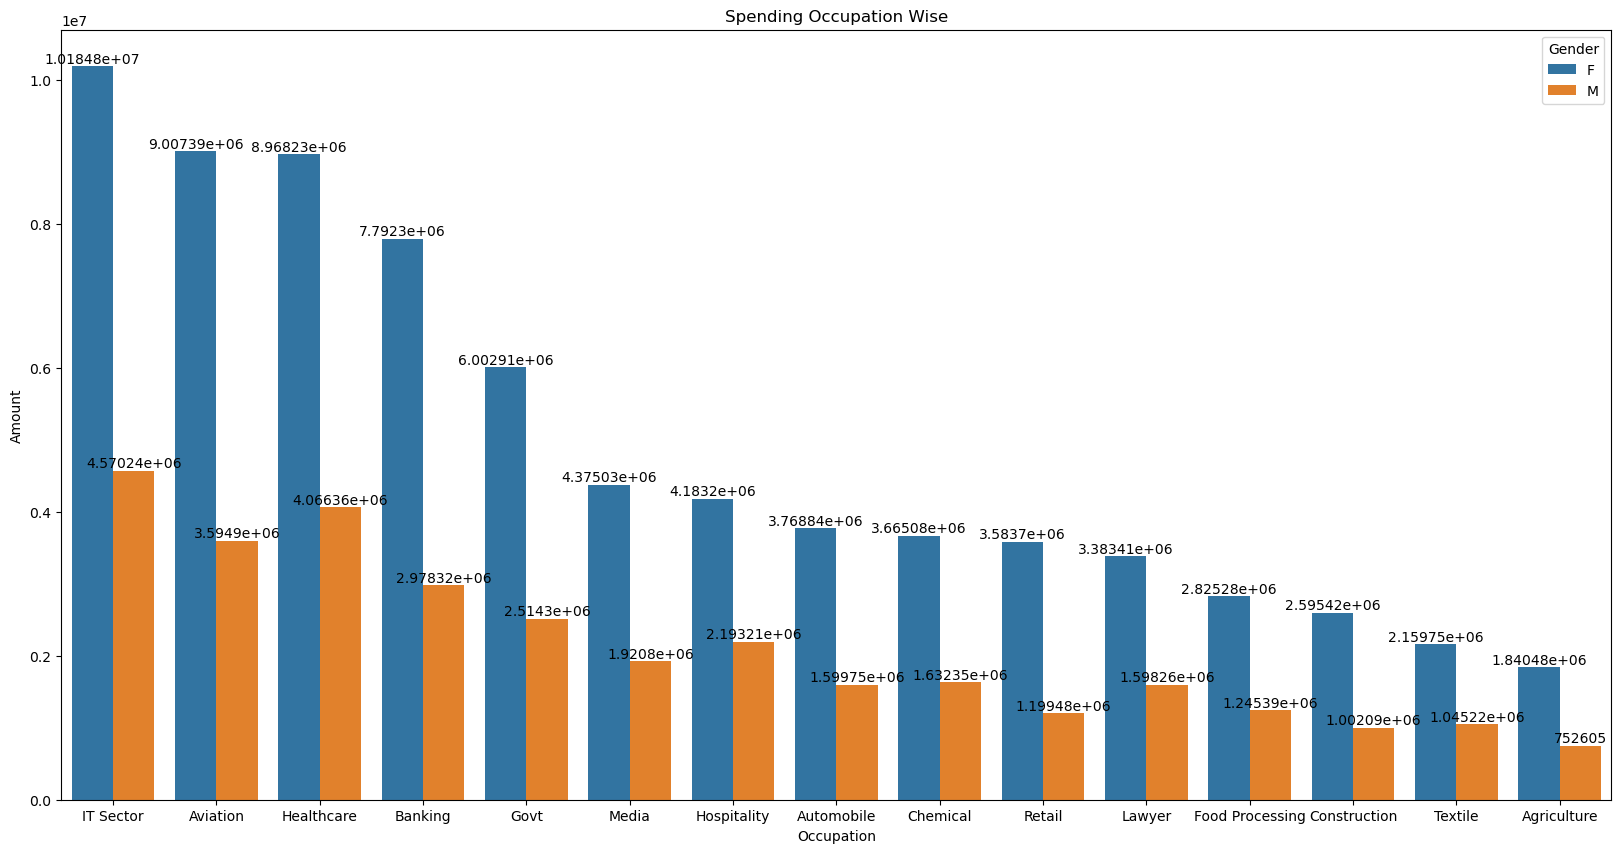

In [99]:
fig = plt.figure(figsize = (20,10))

occupation_group = df.groupby(['Occupation','Gender'],as_index = False)['Amount'].sum().sort_values(by='Amount',ascending=False)
ax = sns.barplot(data=occupation_group, x='Occupation',y='Amount',hue = 'Gender')
plt.title('Spending Occupation Wise')
for bar in ax.containers:
    ax.bar_label(bar)
fig.savefig('Occupation_Group_plot.png')

So we can conclude that the one working in <i> IT Sector spends more </i>

and in That too Women working in <i> IT sector </i> tends to spend more


TOP three spenders works in :
<ul>
    <li> IT</li>
    <li> Aviation</li>
    <li> Healthcare</li>
    </ul>

# On basis of product

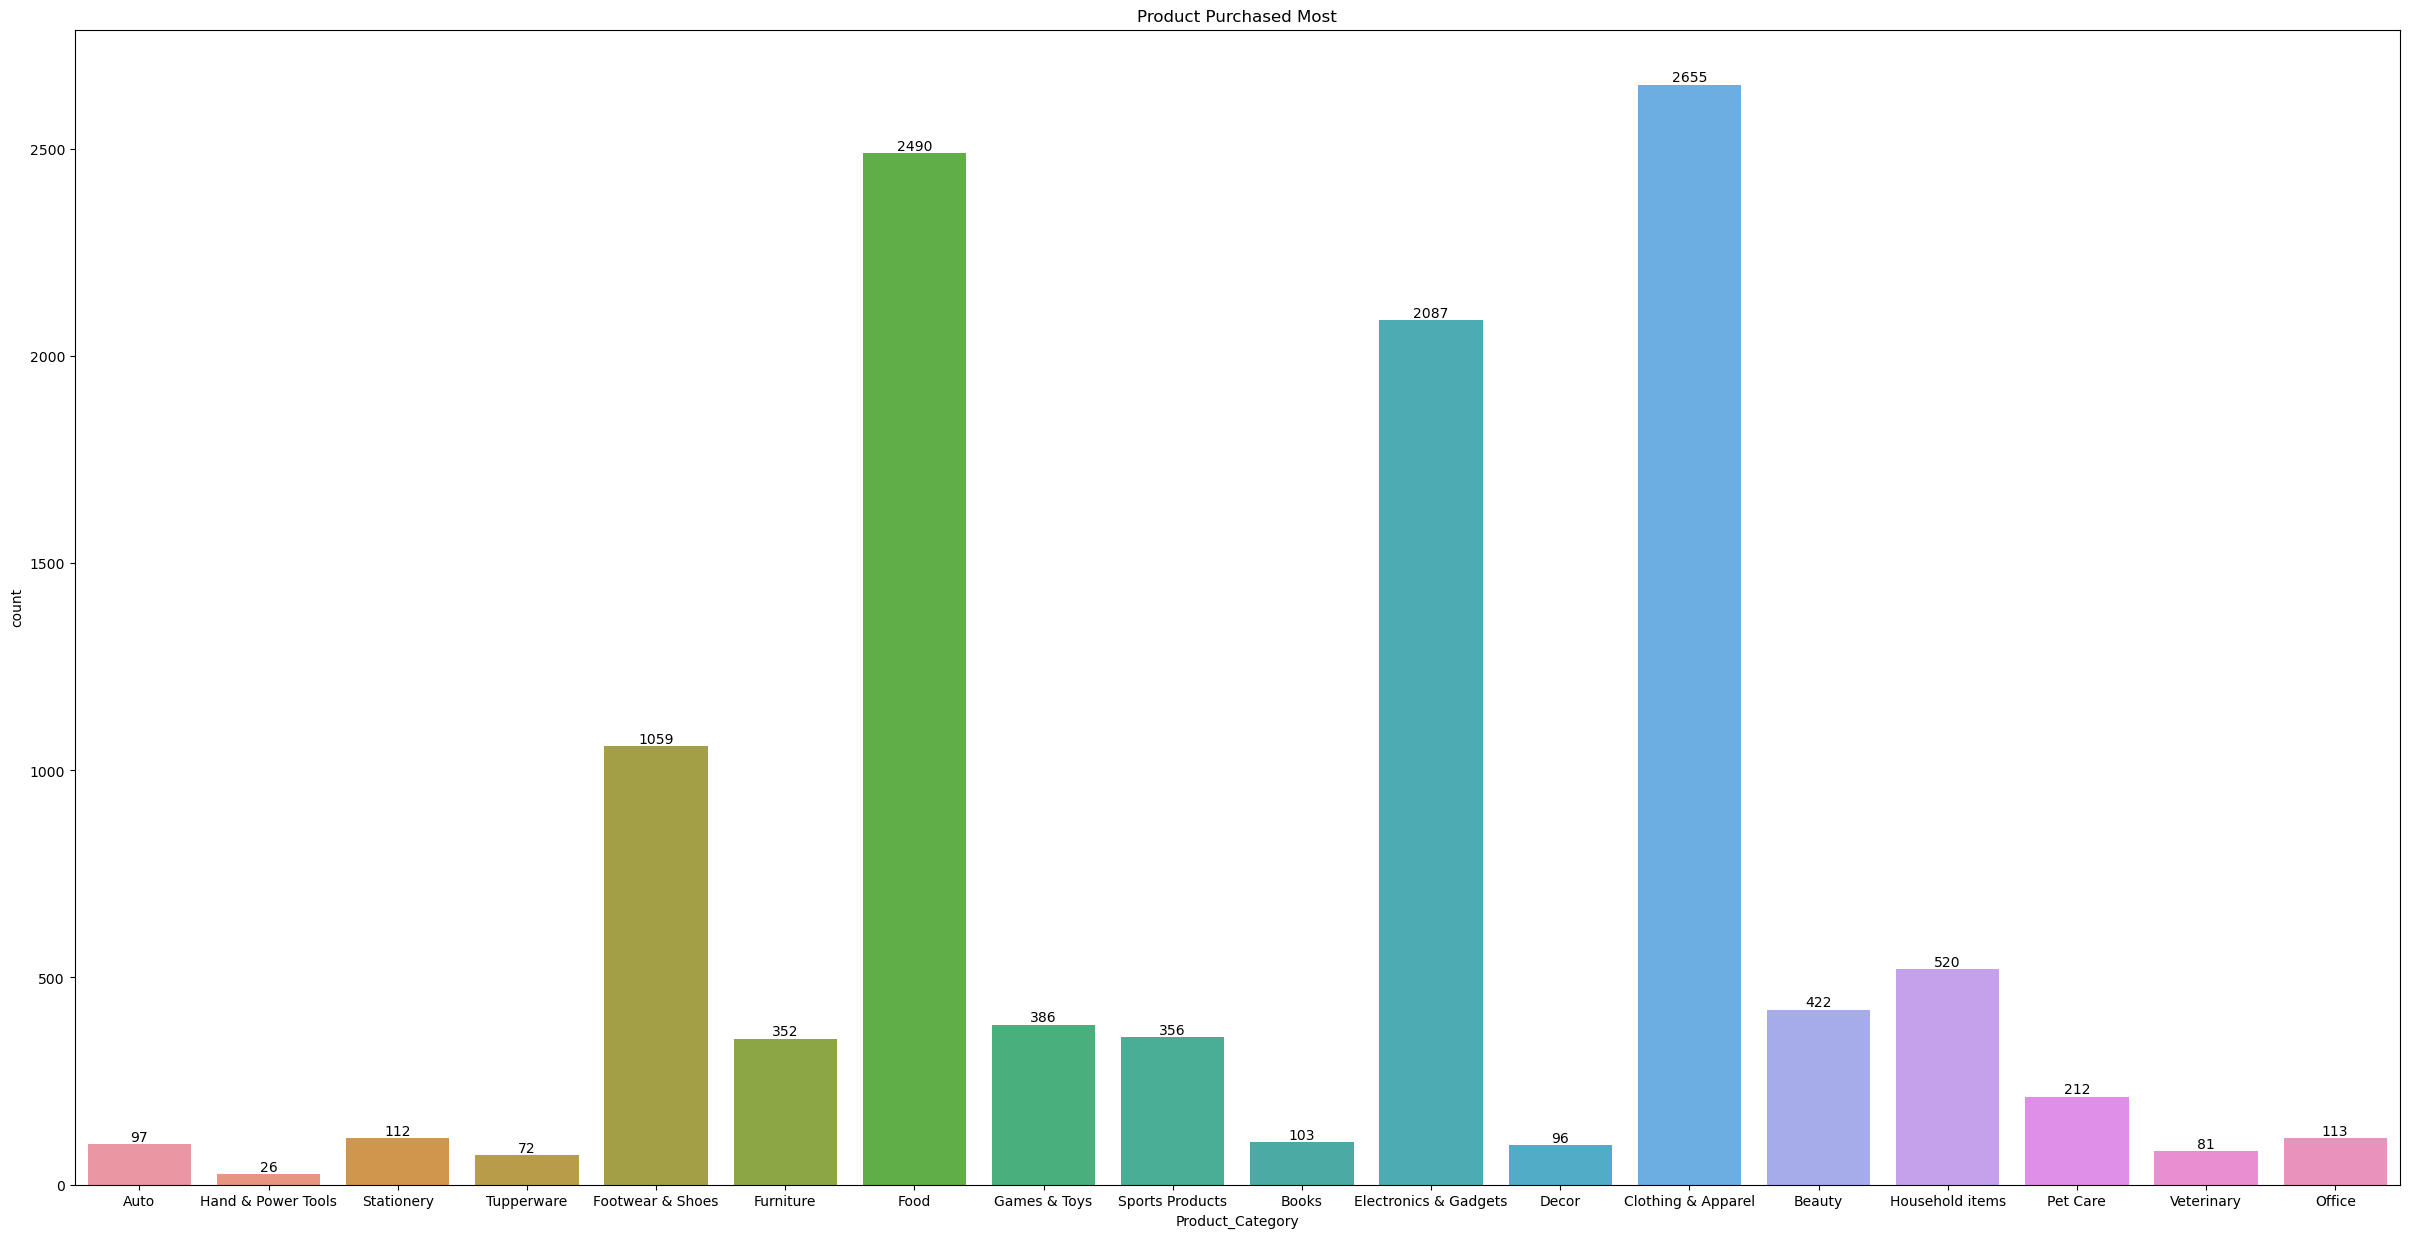

In [100]:
fig = plt.figure(figsize = (30,15))
ax = sns.countplot(data=df, x='Product_Category')
plt.title('Product Purchased Most')
for bar in ax.containers:
    ax.bar_label(bar)
fig.savefig('Product_cat_count_plot.png')

So we can see the most of the people spend on Clothing

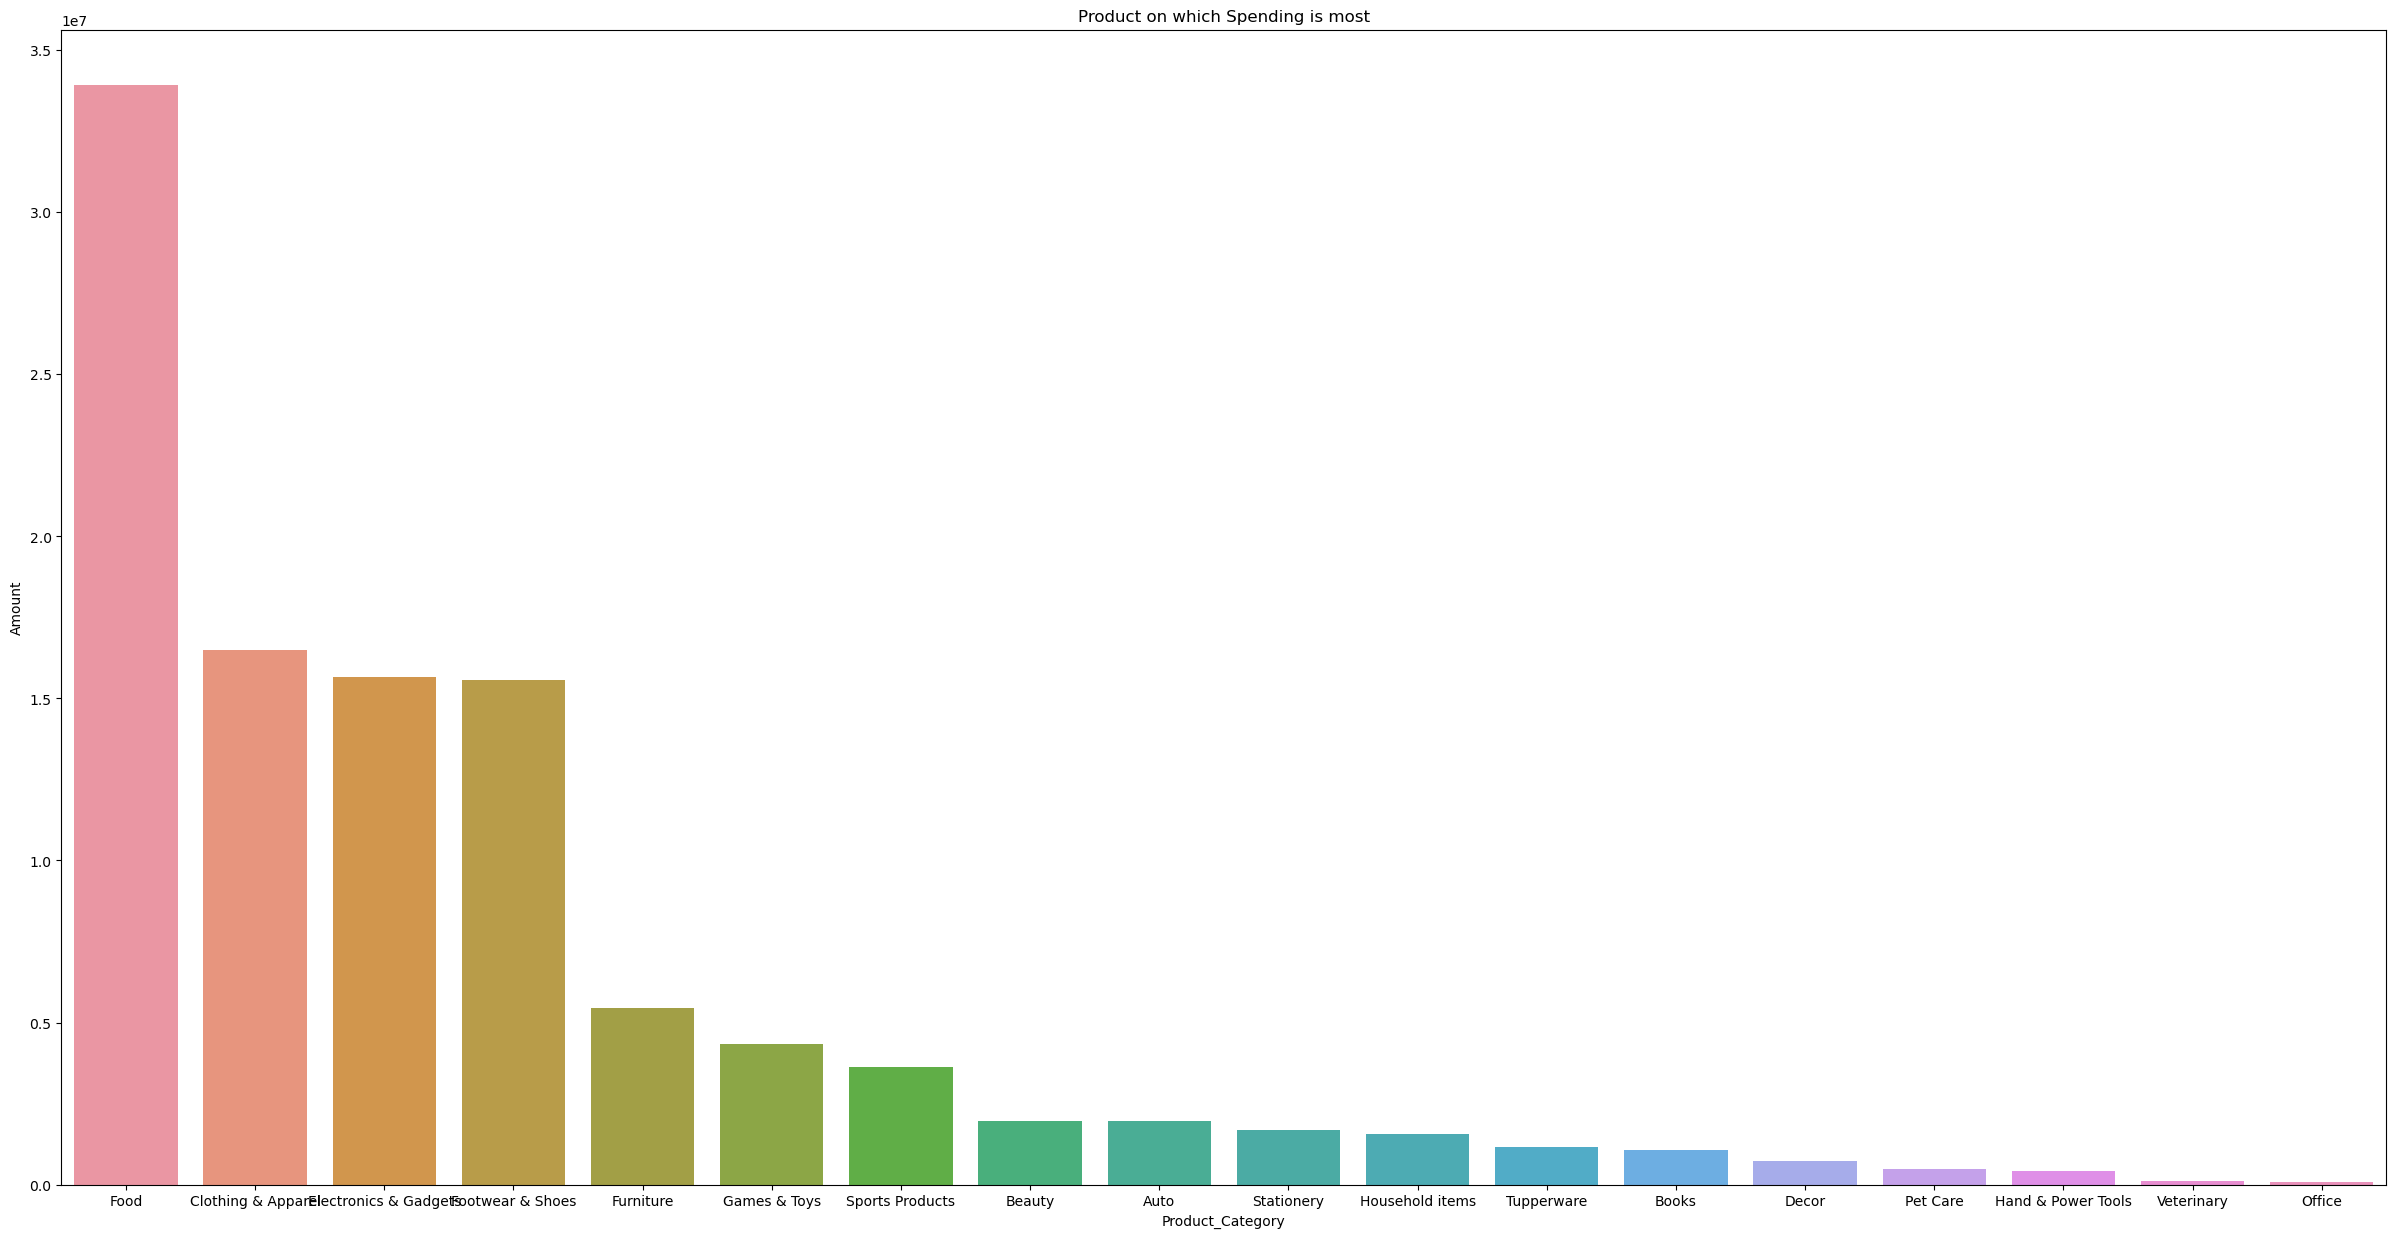

In [101]:
fig = plt.figure(figsize=(30,15))

product = df.groupby('Product_Category',as_index=False)['Amount'].sum().sort_values(by='Amount',ascending=False)
plt.title('Product on which Spending is most')
# as more order does not mean more money, which we concluded above

ax = sns.barplot(data = product, x='Product_Category', y='Amount')
fig.savefig('product_amount_plot.png')

Most of the orders are for Clothing, but amount wise Spending is more on Food.

#Foodie

# Conclusion

<h3>
    So from the above plots we can say that :<br><br>
    <i>Married Women of Age Group 26-35 Working in IT,Aviation or HealthCare sector living in UP, Maharashtra or Karnataka spend more money, and are likely to Spend money on:
        <ul>
            <li> Food</li>
            <li>Clothing</li>
            <li> And Electronics</li>
        </ul>
    </i>
    
 </h3>
 
 
 
 Reach out to me @ [LinkedIn](https://www.linkedin.com/in/nisarg-pipaliya-12b078172/)
                 @[Github](https://github.com/NisargPipaliya)